In [18]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import sys
import os 
from scipy.sparse import linalg
from pathlib import Path
import itertools
if torch.cuda.is_available():  
    device = "cuda" 
else:  
    device = "cpu" 

torch.set_default_dtype(torch.float64)
pi = torch.tensor(np.pi,dtype=torch.float64)
ZERO = torch.tensor([0.]).to(device)


def plot_2D(f,bl = [0,0], ur=[1,1]): 
    
    Nx = 1000
    Ny = 1000 
    xs = np.linspace(bl[0], ur[0], Nx)
    ys = np.linspace(bl[1], ur[1], Ny)
    x, y = np.meshgrid(xs, ys, indexing='xy')
    xy_comb = np.stack((x.flatten(),y.flatten())).T
    xy_comb = torch.tensor(xy_comb)
    z = f(xy_comb).reshape(Nx,Ny)
    z = z.detach().numpy()
    plt.figure(figsize=(4,4),dpi=200)
    ax = plt.axes(projection='3d')
    ax.plot_surface(x , y , z )

    plt.show()

In [1]:
# def target(x):
#     """ Target function for the Poisson equation
#     """
    # return (x[:,0:1]**2 + x[:,1:2]**2)**0.5  

def target(x):
    # Polar angle theta ∈ (-pi, pi]
    theta = torch.atan2(x[:,1], x[:,0])  # shape [N]
    
    # Shift to [0, 2pi)
    theta = torch.where(theta < 0, theta + 2 * pi, theta)

    # Radius r
    r = torch.sqrt(x[:,0]**2 + x[:,1]**2)

    # u = r^{2/3} * sin(2/3 * theta)
    u = r**(2/3) * torch.sin((2/3) * theta)

    return u.unsqueeze(1)  # make shape [N, 1] 

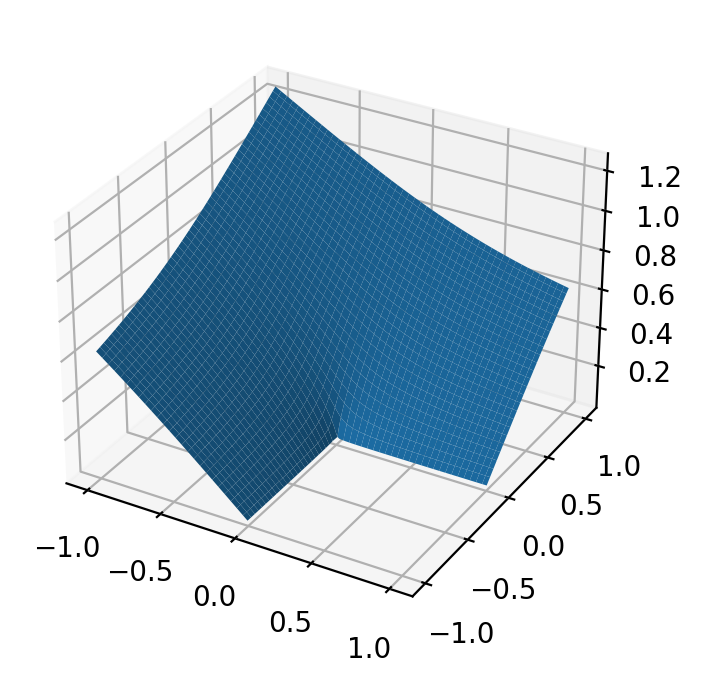

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the L-shaped domain: (-1,0)x(-1,1) ∪ (0,1)^2
def in_L_shape(x, y):
    return ((x < 0) & (y >= -1) & (y <= 1)) | ((x >= 0) & (x <= 1) & (y >= 0) & (y <= 1))

# Create meshgrid
res = 200
x = np.linspace(-1, 1, res)
y = np.linspace(-1, 1, res)
X, Y = np.meshgrid(x, y)

# Flatten mesh
X_flat = X.flatten()
Y_flat = Y.flatten()
mask = in_L_shape(X_flat, Y_flat)
X_domain = X_flat[mask]
Y_domain = Y_flat[mask]

# Stack and convert to torch
points = torch.tensor(np.vstack([X_domain, Y_domain]).T, dtype=torch.float32)

# Define the target function
def target(x):
    pi = torch.tensor(np.pi)
    theta = torch.atan2(x[:,1], x[:,0])
    theta = torch.where(theta < 0, theta + 2 * pi, theta)
    r = torch.sqrt(x[:,0]**2 + x[:,1]**2)
    u = r**(2/3) * torch.sin((2/3) * theta)
    return u.unsqueeze(1)

# Evaluate
u_vals = target(points).detach().numpy().flatten()

# Prepare full array with NaNs
Z = np.full(X.shape, np.nan)
Z_flat = Z.flatten()
Z_flat[mask] = u_vals
Z = Z_flat.reshape(X.shape)

# Plot
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, edgecolor='none', linewidth=0, antialiased=True)
# ax.set_title(r"$u(r,\theta) = r^{2/3} \sin\left(\frac{2}{3} \theta\right)$ on L-shaped domain")
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("u(x)")
# fig.colorbar(surf, ax=ax, shrink=0.6)
# plt.tight_layout()
plt.show()


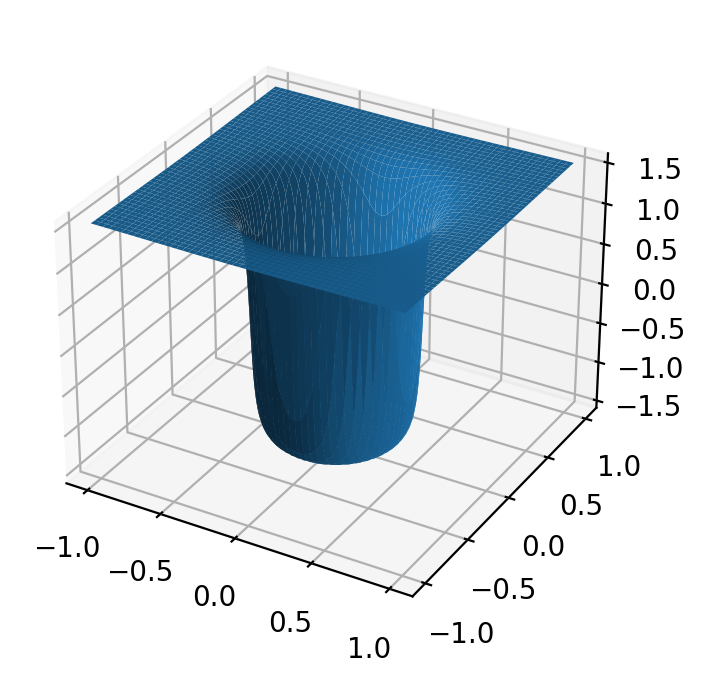

In [20]:

def target(x):
    r = 0.5 
    epsilon = 0.02 
    y_circle = (x[:,0:1]**2 + x[:,1:2]**2 )**0.5 -r 
    z=  torch.atan(y_circle/epsilon) 
    return z 

plot_2D(target,[-1,-1],[1,1])   

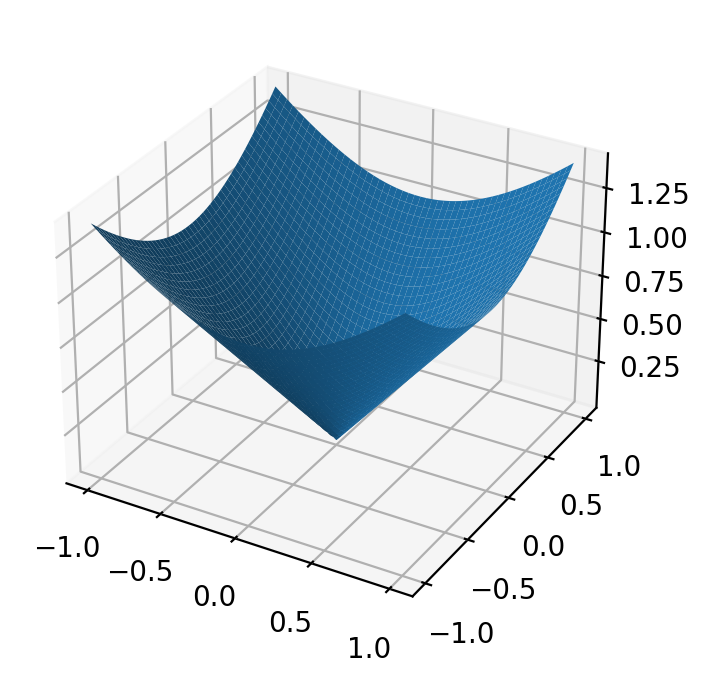

In [19]:

def target(x):

    z = (x[:,0:1]**2 + x[:,1:2]**2 )**0.5 
    return z 

plot_2D(target,[-1,-1],[1,1])   